In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from scipy.optimize import fsolve

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
#Beuermann's ephemeris
T0_bjd = 48773.21461
T0_bjd_err = 0.00009
P0_day = 0.0623628426
P0_day_err = 0.0000000006

In [3]:
#m = 0
#c = 0
#K = 33.7       #s
#P = 10220       #days
#e = 0.39               #No-unit
#w = -1.36           #rad
#tau = 53025   #days

#set3
m = 0.0623628460/(24*60*60)
c = 5.799593360903959
K = 45.52
P = 12643.22
e = 0.15
w = -2.09
tau = 52060

### Define function

In [4]:
from scipy.optimize import fsolve

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(t,m,c,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t - T0_bjd)/P0_day
    return m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [5]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    Epoch = np.round((x_range[i] - T0_bjd)/P0_day)
    y_range[i] = lnLTT_fit(x_range[i], m,c,K,P,e,w,tau)
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.2f %0.10f %0.10f %0.0f %0.5f' %(i, x_range[i], T0_bjd, P0_day, Epoch, y_range[i]))
    
data_out = interporate
f = open("interporate_lnLTT_fit_Beuermann.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnLTT_fit_Beuermann.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnLTT_Beuermann = Data_out[:,1]
Epoch_range_lnLTT_Beuermann = Data_out[:,4]
y_range_lnLTT_Beuermann = Data_out[:,5]

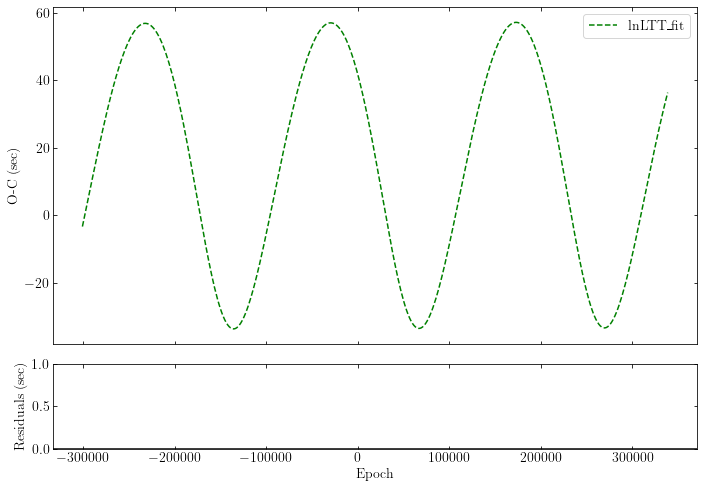

In [6]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#ax0.errorbar((x-T)/Period, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(Epoch_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '--', color='green',label='lnLTT\_fit')
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')


#ax1.errorbar((x-T)/Period, Res_lnLTT_fit, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("2022_May_week4_Beuermann_Schwope_ephemeris_lnLTT.pdf", dpi=1200)
plt.show()

### Perform the O-C diagram from Beuermann data

In [7]:
ls

Beuermann2011_generate_model_1.out
Beuermann2011_generate_model_demo.txt
Beuermann2011_generated_model.ipynb
Beuermann2011_generated_model.pdf
Beuermann2011_generated_model_decrease.ipynb
interporate_generated_data.out
interporate_lnLTT_fit_Beuermann.out
oc_dpleo_Beuermann_Schwope.inp*
oc_linear_Beuermann2011_generated_model.txt
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [8]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Beuermann_Schwope.inp",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Beuermann_Schwope.inp"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [9]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [10]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.553179	6.153183	8.157496
1	44214.615620	-73098	44214.615620	44214.615542	6.771582	8.157472
2	44214.677980	-73097	44214.677980	44214.677904	6.525982	8.157448
3	44968.023090	-61017	44968.023090	44968.021043	176.854251	92.278453
4	44968.957120	-61002	44968.957120	44968.956486	54.802241	92.278426
5	44969.019620	-61001	44969.019620	44969.018849	66.652640	92.278424
6	44978.997550	-60841	44978.997550	44978.996903	55.868538	92.278140
7	44993.900780	-60602	44993.900780	44993.901623	-72.814015	52.318025
8	44993.963280	-60601	44993.963280	44993.963986	-60.963615	52.318022
9	44994.026420	-60600	44994.026420	44994.026348	6.182784	52.318019
10	45020.905130	-60169	45020.905130	45020.904734	34.248908	12.615554
11	45021.902920	-60153	45021.902920	45021.902539	32.911297	12.615349
12	45024.833860	-60106	45024.833860	45024.833593	23.096068	52.316488
13	45731.966400	-48767	45731.966400	45731.965865	

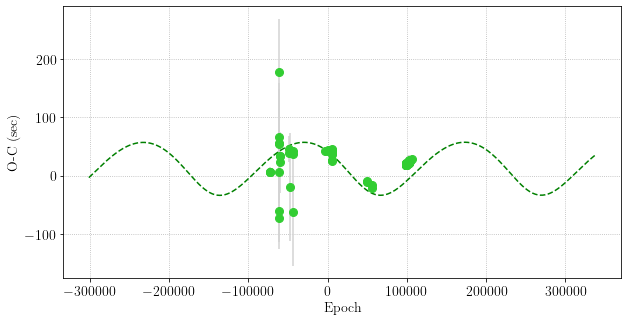

In [11]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
BJD_time = Data[:,0]
Cycle = Data[:,1]
T_O = Data[:,2]
T_C = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(Cycle, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
plt.plot(Epoch_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '--', color='green',label='lnLTT\_fit')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
#plt.xlabel('BJD - 2400000')
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("Beuermann2011_generated_model.pdf", dpi=1200)
plt.show()